# Diabet Project 

## Data Understanding

In [144]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression

import warnings
warnings.simplefilter(action="ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

#Uyarilari Kapat
pd.options.mode.chained_assignment = None


In [126]:
df_ = pd.read_excel("./Diabet_dataset.xlsx")

In [127]:
df=df_.copy()

In [128]:
df

,ID,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glukoz_range,BMI_range,Insulin_range
0,1,1,89.000,66.000,23.000,94.000,28.100,0.167,21,0,normal,normal,risky
1,2,0,137.000,40.000,35.000,168.000,43.100,2.288,33,1,risky,ext_obese,high_risky
2,3,5,116.000,74.000,33.500,128.000,25.600,0.201,30,0,normal,normal,high_risky
3,4,3,78.000,50.000,32.000,88.000,31.000,0.248,26,1,normal,obese,risky
4,5,10,115.000,60.000,38.500,315.500,35.300,0.134,29,0,normal,ext_obese,high_risky
...,...,...,...,...,...,...,...,...,...,...,...,...,...
753,754,10,101.000,76.000,48.000,180.000,32.900,0.171,63,0,normal,obese,high_risky
754,755,2,122.000,70.000,27.000,146.000,36.800,0.340,27,0,normal,ext_obese,high_risky
755,756,5,121.000,72.000,23.000,112.000,26.200,0.245,30,0,normal,normal,high_risky
756,757,1,126.000,60.000,27.000,112.000,30.100,0.349,47,1,risky,obese,high_risky


## Data Preparation

In [141]:
df_.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,758.000,379.500,218.960,1.000,190.250,379.500,568.750,758.000
Pregnancies,758.000,3.836,3.371,0.000,1.000,3.000,6.000,17.000
Glucose,758.000,121.668,30.481,44.000,99.000,117.000,140.750,199.000
BloodPressure,758.000,72.381,12.269,24.000,64.000,72.000,80.000,122.000
SkinThickness,758.000,29.103,9.920,7.000,22.000,29.000,36.000,99.000
Insulin,758.000,159.040,111.971,14.000,88.000,130.000,190.375,846.000
BMI,758.000,32.485,6.911,18.200,27.500,32.400,36.600,67.100
DiabetesPedigreeFunction,758.000,0.474,0.332,0.078,0.244,0.377,0.628,2.420
Age,758.000,33.306,11.787,21.000,24.000,29.000,41.000,81.000
Outcome,758.000,0.350,0.477,0.000,0.000,0.000,1.000,1.000


In [116]:
df.shape

(758, 13)

In [129]:
df.drop(["Glukoz_range", "BMI_range", "Insulin_range"], axis=1, inplace = True)

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        758 non-null    int64  
 1   Pregnancies               758 non-null    int64  
 2   Glucose                   758 non-null    float64
 3   BloodPressure             758 non-null    float64
 4   SkinThickness             758 non-null    float64
 5   Insulin                   758 non-null    float64
 6   BMI                       758 non-null    float64
 7   DiabetesPedigreeFunction  758 non-null    float64
 8   Age                       758 non-null    int64  
 9   Outcome                   758 non-null    int64  
dtypes: float64(6), int64(4)
memory usage: 59.3 KB


In [20]:
df.describe([0.01, 0.05, 0.25, 0.50, 0.75, 0.95, 0.99]).T

,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max
ID,758.000,379.500,218.960,1.000,8.570,38.850,190.250,379.500,568.750,720.150,750.430,758.000
Pregnancies,758.000,3.836,3.371,0.000,0.000,0.000,1.000,3.000,6.000,10.000,13.000,17.000
Glucose,758.000,121.668,30.481,44.000,67.570,80.000,99.000,117.000,140.750,181.000,196.000,199.000
BloodPressure,758.000,72.381,12.269,24.000,44.000,52.000,64.000,72.000,80.000,90.300,106.000,122.000
SkinThickness,758.000,29.103,9.920,7.000,10.000,14.000,22.000,29.000,36.000,45.000,52.000,99.000
Insulin,758.000,159.040,111.971,14.000,24.140,49.000,88.000,130.000,190.375,375.300,588.030,846.000
BMI,758.000,32.485,6.911,18.200,19.500,22.200,27.500,32.400,36.600,44.500,50.989,67.100
DiabetesPedigreeFunction,758.000,0.474,0.332,0.078,0.094,0.141,0.244,0.377,0.628,1.136,1.698,2.420
Age,758.000,33.306,11.787,21.000,21.000,21.000,24.000,29.000,41.000,58.000,67.000,81.000
Outcome,758.000,0.350,0.477,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000,1.000


In [21]:
df.isnull().sum()

ID                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Corralation Analysis

In [102]:
df.iloc[:,1:9]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1,89.000,66.000,23.000,94.000,28.100,0.167,21
1,0,137.000,40.000,35.000,168.000,43.100,2.288,33
2,5,116.000,74.000,33.500,128.000,25.600,0.201,30
3,3,78.000,50.000,32.000,88.000,31.000,0.248,26
4,10,115.000,60.000,38.500,315.500,35.300,0.134,29
...,...,...,...,...,...,...,...,...
753,10,101.000,76.000,48.000,180.000,32.900,0.171,63
754,2,122.000,70.000,27.000,146.000,36.800,0.340,27
755,5,121.000,72.000,23.000,112.000,26.200,0.245,30
756,1,126.000,60.000,27.000,112.000,30.100,0.349,47


In [119]:
df.iloc[:,1:9].corrwith(df["Outcome"]).sort_values(ascending=False)

Glucose                    0.486
BMI                        0.315
Age                        0.234
Pregnancies                0.216
SkinThickness              0.197
Insulin                    0.186
DiabetesPedigreeFunction   0.170
BloodPressure              0.163
dtype: float64

## Boxplot

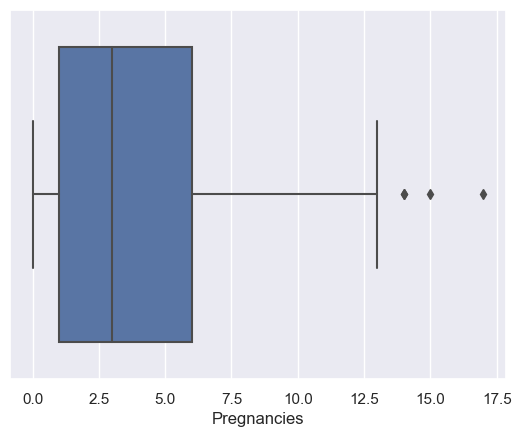

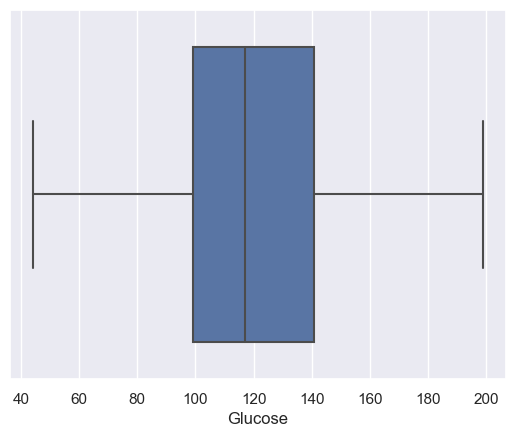

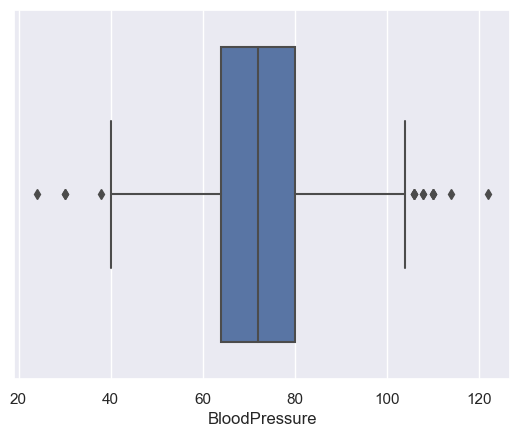

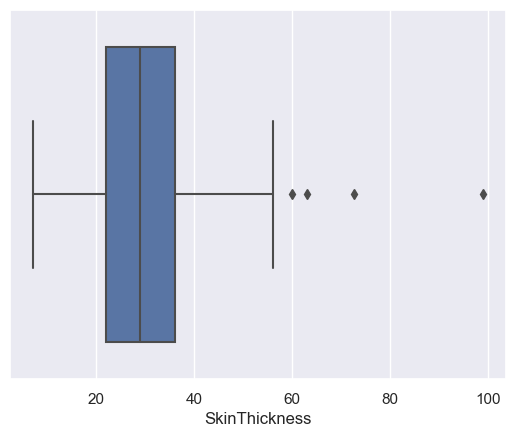

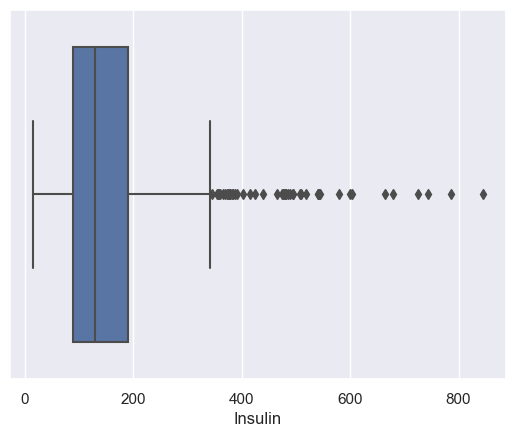

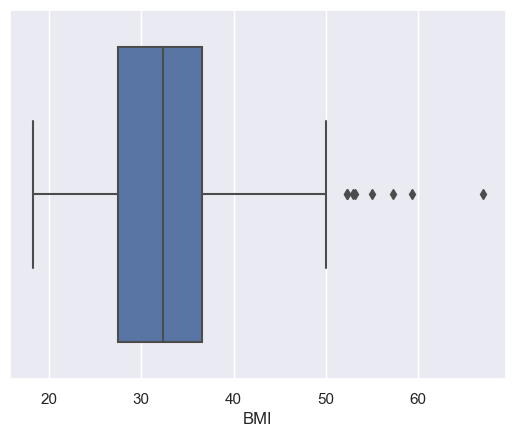

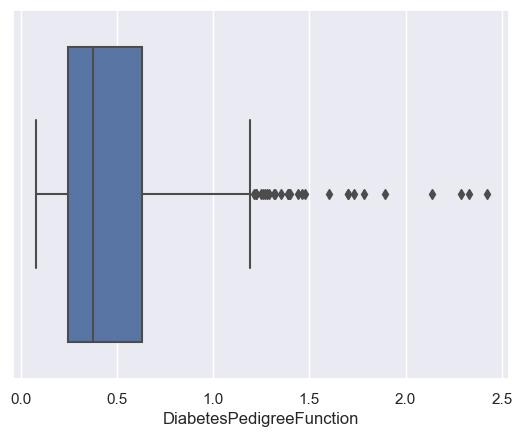

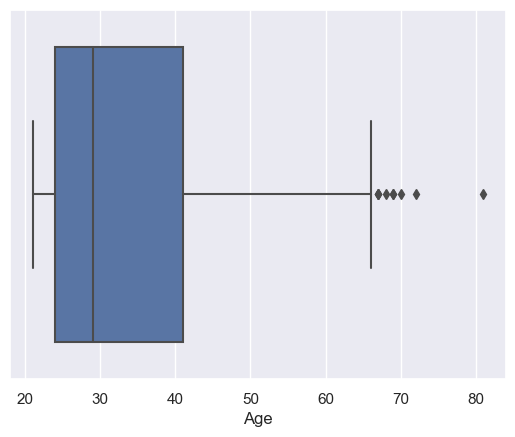

In [143]:
for x in train:
    sns.boxplot(x=df[x])
    plt.show()                

## Capping Outliers

In [131]:
for col in training.columns:
    Q1 = training[col].quantile(0.25)
    Q3 = training[col].quantile(0.75)
    IQR = Q3 - Q1
    whisker_width = 1.5
    lower_whisker = Q1 - (whisker_width * IQR)
    upper_whisker = Q3 + (whisker_width * IQR)
    train_cap[col] = [lower_whisker if x < lower_whisker else (upper_whisker if x > upper_whisker else x) for x in training[col]]

## Histogram

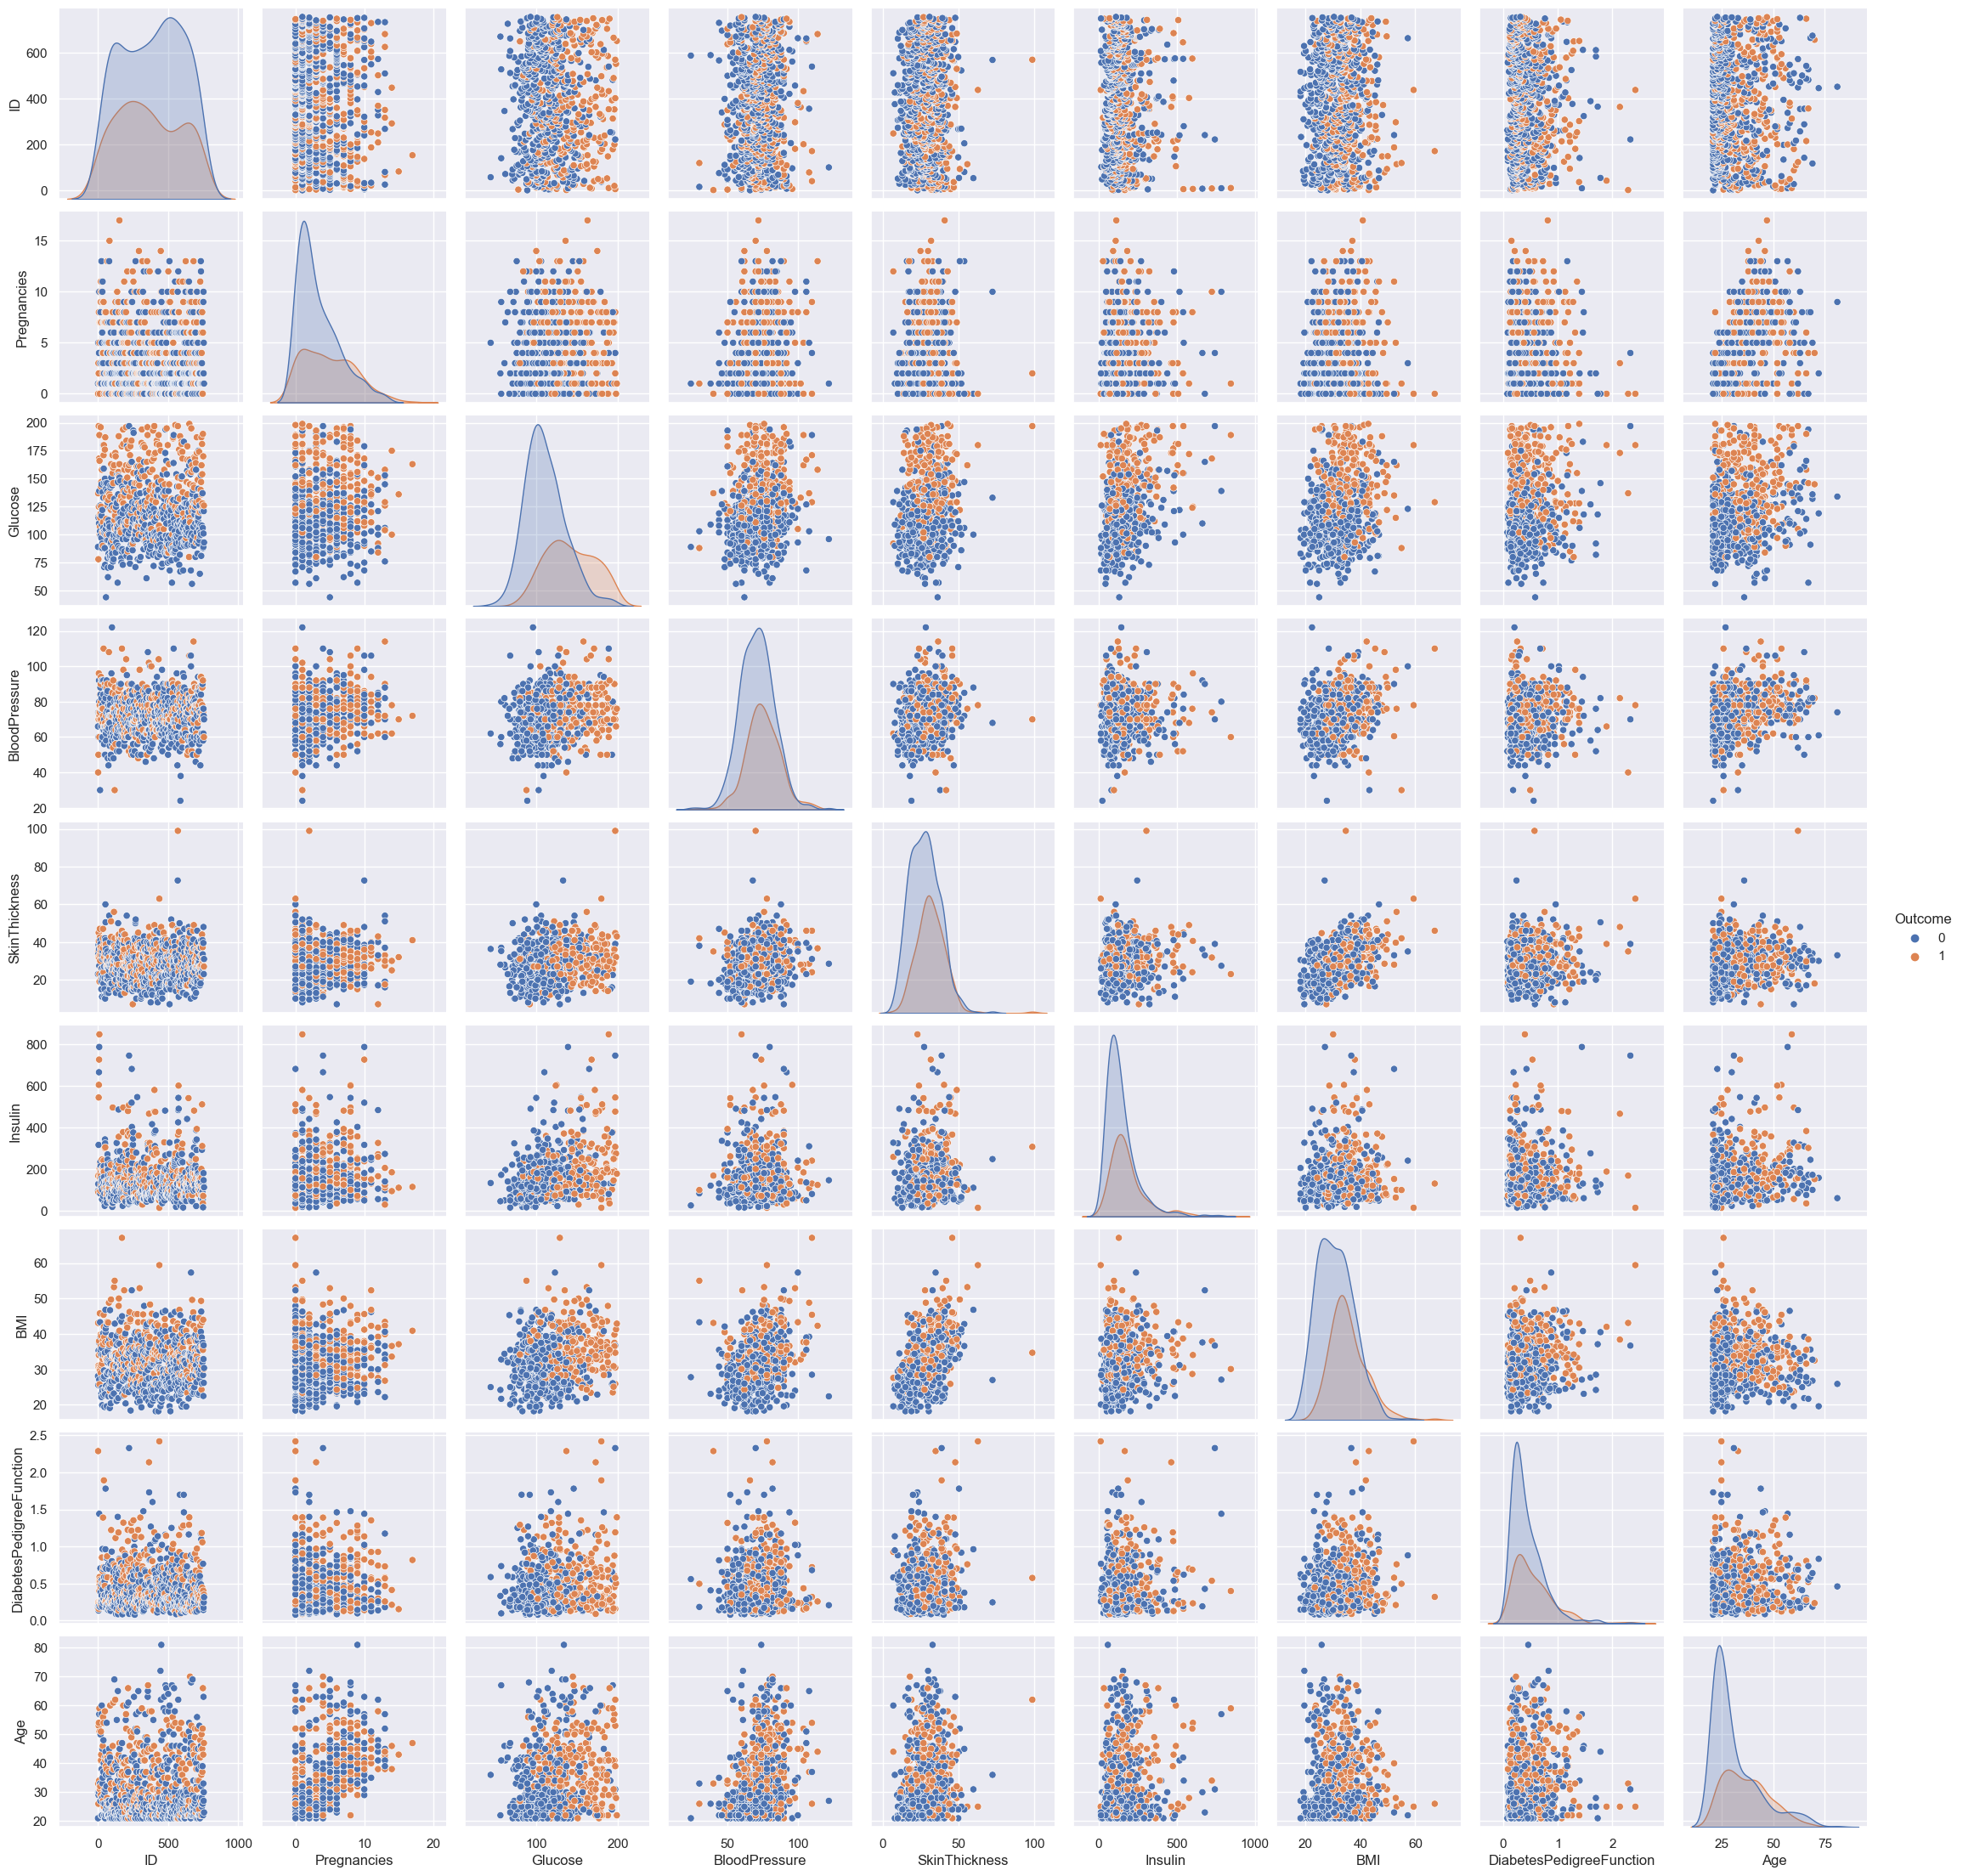

In [142]:
sns.pairplot(df, hue='Outcome', diag_kind='kde')
plt.show()


# Base Model Kurulumu

In [132]:
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']
x = pd.get_dummies(df[features])

# Target
y = df['Outcome']

In [133]:
# Split data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 1/11, random_state = 242)

In [134]:
# Fitting model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression


model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.782608695652174
Precision: 0.6470588235294118
Recall: 0.55
F1 Score: 0.5945945945945946


In [136]:
import pickle
filename = 'linear_model.pkl'
pickle.dump(model, open(filename, 'wb'))